<a href="https://colab.research.google.com/github/Kirtiwardhan01/Human-Activity-Recognition-/blob/master/Human_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="60" width="120" src="https://shwetkm.github.io/upxlogo.png"></img>
# UpX Academy - Machine Learning Track
# LDA -Linear Disriminant Analysis

## The Human Activity Recognition

### Table of Contents

1. [Dataset Description](#titanic)
2. [Importing the packages and dataset](#packages)
3. [Exploring the dataset](#explore)
4. [Exploratory Data Analysis](#eda)
5. [Modelling](#Mo)
6. [LDA](#lda)
     - 6.1 [Training LDA Model](#tlda)
     - 6.2 [Predictions from LDA Model](#plda)
     - 6.3 [Evaluating the LDA Model](#elda)
  

### 1. Dataset Description  <a id='titanic'>

**Dataset** : 
The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a wrist-mounted smartphone with embedded inertial sensors. 

**Objective**
The objective is to classify activities into one of the six activities performed.

**Description of experiment**

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone on the wrist. 

Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

**Attribute information**
For each record in the dataset the following is provided:

Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

Triaxial Angular velocity from the gyroscope.

A 561-feature vector with time and frequency domain variables.

Its activity label.

An identifier of the subject who carried out the experiment.

### 2. Importing the packages and dataset  <a id='packages'>

In [0]:
your_local_path=""

In [0]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns',600)

In [0]:
# Importing the train and test datasets
train_df = pd.read_csv("train.csv")
train_df.shape      # Checking the number of rows and columns

(7352, 563)

In [0]:
test_df = pd.read_csv("test.csv")
test_df.shape       # Checking the number of rows and columns 

(2947, 563)

### 3. Exploring the dataset  <a id='explore'>

In [0]:
train_df.head()    #Checking the top 5 observations

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [0]:
test_df.head()    #Checking the top 5 observations

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [0]:
train_df.isnull().sum().any()            # Checking the number of missing values

False

In [0]:
test_df.isnull().sum().any()              # Checking the number of missing values

False

**Observation**: There are no missing values in train and test data.

In [0]:
train_df.dtypes.value_counts()             # Checking the datatype of the columns

float64    561
object       1
int64        1
dtype: int64

In [0]:
test_df.dtypes.value_counts()             # Checking the datatype of the columns

float64    561
object       1
int64        1
dtype: int64

In [0]:
train_df['Activity'].value_counts()       # Checking the number of records for each labels

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64


### 4. Exploratory Data Analysis  <a id='explore'>

How active are the participants ?

In [0]:
# We are going to count how many sensor measurements are there for each activity for each participants
pivoted = train_df.pivot_table(index="subject",columns="Activity",aggfunc='count').iloc[:,:6]    # Count of each subject for different activity
count_df = pd.DataFrame(pivoted.to_records())       # Convert pivot table to dataframe
count_df = count_df.set_index('subject')            # Change the index 
count_df.columns = ['LAYING','STANDING','SITTING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS']  # Rename the columns
count_df.head()

,LAYING,STANDING,SITTING,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS
subject,,,,,,
1,50,47,53,95,49,53
3,62,52,61,58,49,59
5,52,44,56,56,47,47
6,57,55,57,57,48,51
7,52,48,53,57,47,51


In [0]:
# Sampling is done at 1.28 seconds. So the total duration for all the actions will be count*1.28
# This is a sample, which is why the duration is quiet less. If a person wears the tracker for the entire day,
# you can measure how many hours he walks, sleeps, sits... etc

duration_df = count_df*1.28
duration_df

,LAYING,STANDING,SITTING,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS
subject,,,,,,
1,64.00,60.16,67.84,121.60,62.72,67.84
3,79.36,66.56,78.08,74.24,62.72,75.52
5,66.56,56.32,71.68,71.68,60.16,60.16
6,72.96,70.40,72.96,72.96,61.44,65.28
7,66.56,61.44,67.84,72.96,60.16,65.28
8,69.12,58.88,69.12,61.44,48.64,52.48
11,72.96,67.84,60.16,75.52,58.88,69.12
14,65.28,69.12,76.80,75.52,57.60,69.12
15,92.16,75.52,67.84,69.12,53.76,61.44


In [0]:
# Feature Engineering:  Creating new columns, active and passive

duration_df['Active'] = duration_df['WALKING'] + duration_df['WALKING_DOWNSTAIRS'] + duration_df['WALKING_UPSTAIRS']
duration_df['Passive'] = duration_df['LAYING'] + duration_df['SITTING'] + duration_df['STANDING']
duration_df

,LAYING,STANDING,SITTING,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,Active,Passive
subject,,,,,,,,
1,64.00,60.16,67.84,121.60,62.72,67.84,252.16,192.00
3,79.36,66.56,78.08,74.24,62.72,75.52,212.48,224.00
5,66.56,56.32,71.68,71.68,60.16,60.16,192.00,194.56
6,72.96,70.40,72.96,72.96,61.44,65.28,199.68,216.32
7,66.56,61.44,67.84,72.96,60.16,65.28,198.40,195.84
8,69.12,58.88,69.12,61.44,48.64,52.48,162.56,197.12
11,72.96,67.84,60.16,75.52,58.88,69.12,203.52,200.96
14,65.28,69.12,76.80,75.52,57.60,69.12,202.24,211.20
15,92.16,75.52,67.84,69.12,53.76,61.44,184.32,235.52


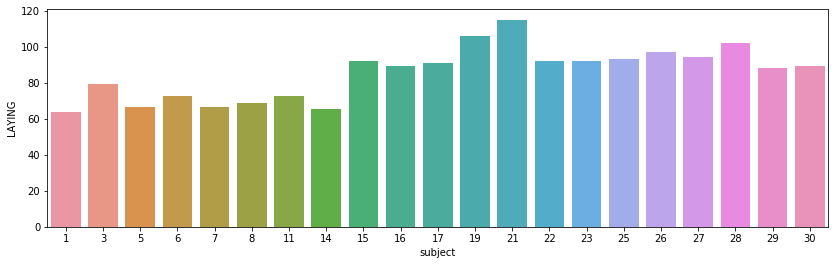

In [0]:
plt.figure(figsize=(14,4))
sns.barplot(x = duration_df.index, y = duration_df.LAYING)

**Observation**: Person 1 and 14 sleep very little. 

The missing numbers in x-axis are the people who are present in test data.

<BarContainer object of 21 artists>

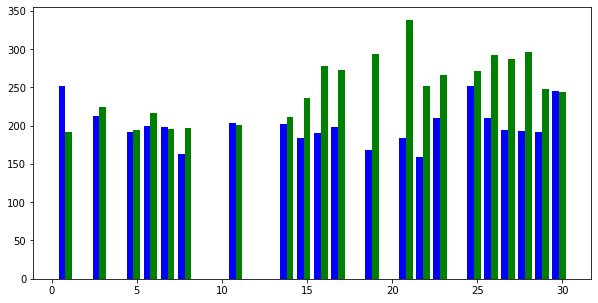

In [0]:
x = duration_df.index
plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.bar(x-0.4,duration_df.Active,width=.4,color='b',align='center')
ax.bar(x,duration_df.Passive,width=0.4, color='g',align='center')



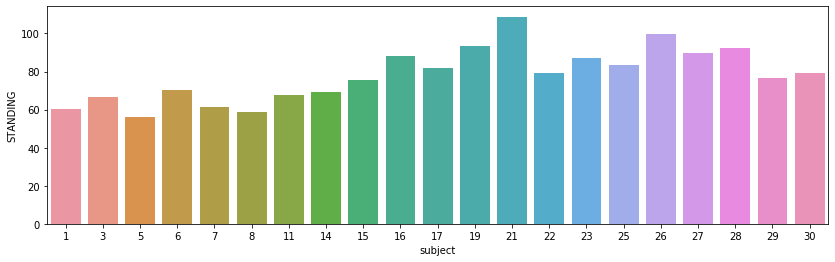

In [0]:
plt.figure(figsize=(14,4))
sns.barplot(x = duration_df.index, y = duration_df.STANDING)

**Obsrvation** = Person 21 and 26 stand most of the times

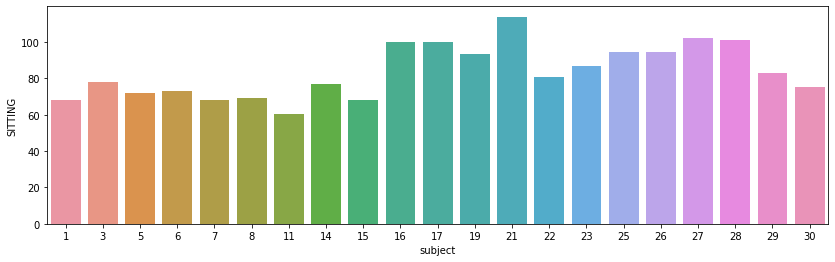

In [0]:
plt.figure(figsize=(14,4))
sns.barplot(x = duration_df.index, y = duration_df.SITTING)

In [0]:
X_train_df = train_df.drop(['Activity', 'subject'], axis=1) 
y_train_df = train_df['Activity']

In [0]:
#Checking the shape of X_train and y_train
X_train_df.shape, y_train_df.shape

((7352, 561), (7352,))

In [0]:
X_test_df = test_df.drop(['Activity', 'subject'], axis=1)
y_test_df = test_df['Activity']

In [0]:
#Checking the shape of X_test and y_test
X_test_df.shape, y_test_df.shape

((2947, 561), (2947,))

We do not need to scale the features as the values are on the same scale of 0 to 1

In [0]:
# Lets reduce the dimensions from 561 columns to 2 columns

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

PrincipalComponents = pca.fit_transform(X_train_df)

principalDf = pd.DataFrame(PrincipalComponents,columns=['PC1','PC2'])

In [0]:
principalDf.head()    

,PC1,PC2
0,-5.520280,-0.290277
1,-5.535350,-0.082530
2,-5.474988,0.287387
3,-5.677232,0.897031
4,-5.748749,1.162952


In [0]:
finalDf = pd.concat([principalDf, y_train_df], axis=1)

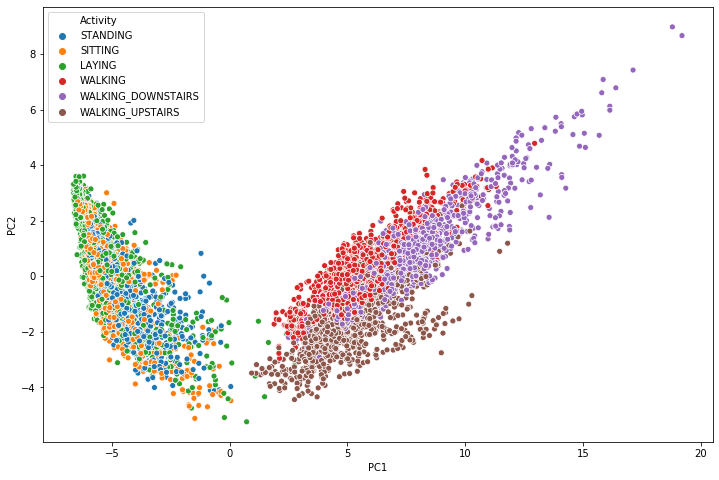

In [0]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='PC1',y='PC2',data=principalDf,hue=y_train_df)

**Observations**: The resting and the active states are clearly separable here.
We can differentiate walking, walking-upstairs and walking-downstairs.
There is not much differentiation between sitting, laying and standing.

**EDA for 3D plot**

In [0]:
pca = PCA(n_components=3)

PrincipalComponents = pca.fit_transform(X_train_df)

principalDf1 = pd.DataFrame(PrincipalComponents, columns= ['PC1','PC2','PC3'])
principalDf1.head()

,PC1,PC2,PC3
0,-5.520280,-0.290278,-1.529929
1,-5.535350,-0.082530,-1.924804
2,-5.474988,0.287387,-2.144642
3,-5.677232,0.897031,-2.018219
4,-5.748749,1.162952,-2.139533


In [0]:
finalDf1 = pd.concat([principalDf1,y_train],axis=1)

In [0]:
import plotly.express as px

In [0]:
fig = px.scatter_3d(finalDf1,x='PC1',y='PC2',z='PC3',color="Activity", color_discrete_map = {"pc1": "pc2", "pc3": "green", "Coderre":"red"})
fig.show()


Observations: Here we are able to see all the different activities using 3 principal components.



### 5. Modelling  <a id='explore'>

We need to check the number of components that explain 95% of total variance

In [0]:
pca1 = PCA()

pca1.fit_transform(X_train_df)


array([[-5.52028030e+00, -2.90277517e-01, -1.52992855e+00, ...,
        -4.99155881e-18,  1.25439797e-17, -1.23198064e-18],
       [-5.53534954e+00, -8.25302495e-02, -1.92480428e+00, ...,
        -4.27601105e-17, -5.73129603e-19,  2.73216567e-18],
       [-5.47498801e+00,  2.87387051e-01, -2.14464160e+00, ...,
         1.17003863e-17, -5.14745501e-18, -1.93537415e-18],
       ...,
       [ 5.85750527e+00, -3.08184349e+00,  6.71207302e-01, ...,
         1.33043399e-17, -1.02123187e-17, -5.11133973e-18],
       [ 5.42109482e+00, -3.42643018e+00,  6.71243268e-01, ...,
        -1.78945578e-18, -1.79333609e-18, -1.55586332e-17],
       [ 5.49797027e+00, -2.78992873e+00,  5.72224007e-03, ...,
        -9.54719557e-18, -1.05171345e-17, -4.15397508e-18]])

In [0]:
pca1.explained_variance_ratio_[:75].sum()   # Minimum number of components for which the variance is 95% is 75

0.9572293262458643

In [0]:
# consider first 75 components as they are explaining the 95% of variation in the data

X_pca = PCA(n_components=75)
train_df_pca = X_pca.fit_transform(X_train_df)     #X_Training set
test_df_pca = X_pca.fit_transform(X_test_df)       #X_Testing set 

Text(0.5, 1, 'Correlation between different features')

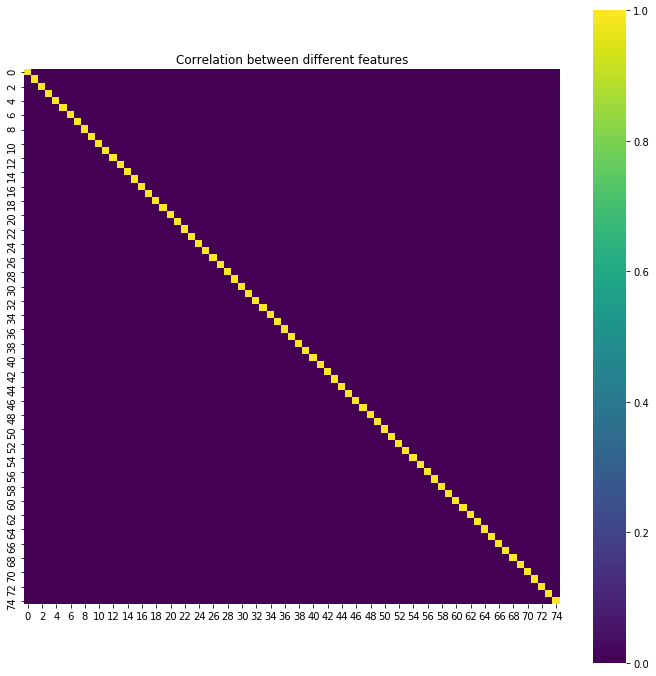

In [0]:
# correlation between the variables after transforming the data with PCA is 0
plt.figure(figsize=(12,12))
correlation = pd.DataFrame(train_df_pca).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

We can see that after applying PCA, there is no correlation among any components

### 6. LDA  <a id='explore'>

In [0]:
# We will train a LDA model on the training set  (train_df_pca)

#Importing LDA classifier from sklearn library 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### 6.1 Training the LDA Model  <a id='edt'>

In [0]:
lda=LinearDiscriminantAnalysis()
model=lda.fit(train_df_pca,y_train_df)

In [0]:
## We'll get variance explaination from only one Linear Discriminant because number of Linear Discriminant=(no.classes-1)
model.explained_variance_ratio_

array([0.69318898, 0.23925268, 0.03905862, 0.02007802, 0.0084217 ])

### 6.2 Predictions from LDA Model  <a id='edt'>

In [0]:
pred=model.predict(test_df_pca)   #Our new X_tessting dataset after applying PCA
pred

array(['SITTING', 'SITTING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype='<U18')

### 6.3 Evaluating the LDA Model  <a id='edt'>

In [0]:
df_confusion = confusion_matrix(y_test_df, pred)
df_confusion

array([[493,  41,   3,   0,   0,   0],
       [ 24, 299, 168,   0,   0,   0],
       [  4, 191, 335,   0,   0,   2],
       [  0,   0,   0, 219, 110, 167],
       [  0,   0,   0, 210, 150,  60],
       [  1,   0,   0,  86,  91, 293]])

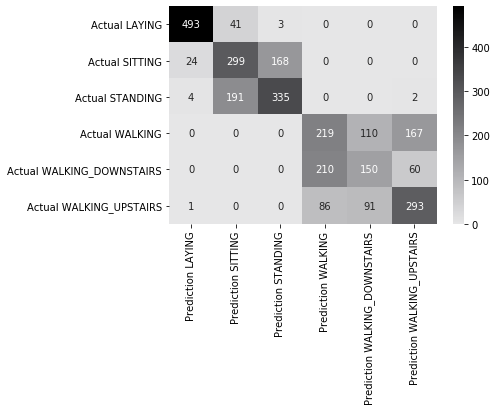

In [0]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion,cmap = cmap,xticklabels=['Prediction LAYING','Prediction SITTING','Prediction STANDING','Prediction WALKING','Prediction WALKING_DOWNSTAIRS','Prediction WALKING_UPSTAIRS'],
            yticklabels=['Actual LAYING','Actual SITTING','Actual STANDING','Actual WALKING','Actual WALKING_DOWNSTAIRS','Actual WALKING_UPSTAIRS'], annot=True,
            fmt='d')

In [0]:
#Calculating the accuracy
Accuracy_score = accuracy_score(y_test_df,pred)
Accuracy_score

0.6070580251102816